In [1]:
# Import some useful standard packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import our "from scratch" version of the Local Outlier Factor algorithm for outlier detection.
from outliers.local_outlier_factor import LocalOutlierFactor

In [3]:
# Import our processed data for block 132749. This block has 45 transactions.
block_132749_data = pd.read_csv('block_132749_data.csv', header = 0)
# Display the first 10 entries. Note that all currency amounts are given in Satoshi, where 
# 1 BTC = 100,000,000 Satoshi
block_132749_data.head(10)

,transaction_hash,num_unique_input_addresses,total_input,transaction_fee
0,3a1b9e330d32fef1ee42f8e86420d2be978bbe0dc5862f...,9,44200000000000,0
1,7d502b2f0323e481c9dcc2c02db2377430e31a71c9d182...,1,4769900000,0
2,c42c77955ffc9085af69a73788582d120b7afcc6f0da99...,1,3200000000,0
3,fec0b26081d6cab234a99a1be5ebebaf5fb3c7fda86a57...,1,5001150000,0
4,344cbe4e26dd0b18b8b1a9e313bd9d343b3a06f7f0a269...,1,199000000,100000
5,96a8d4574ee6d7e75a2e330ed0007b2b17d2d619f0ea94...,1,5007550000,0
6,6975ece908adfeefae3ae1faca3971862bcdb228e1f854...,1,101000000,0
7,77adf633e6ddc135d09772bb461ece494dd931c518dc84...,1,118403317773,0
8,4f72a247e75875e947c2ec695eda3600655c9378459e2a...,1,100689082423,0
9,e65a312ef36468b1232b2336a7ee55ea0c6687a0be442c...,1,849000000,0


In [4]:
# Make a numpy array containing the numerical columns of the data.
X = block_132749_data[['num_unique_input_addresses', 'total_input', 'transaction_fee']].to_numpy()

# Normalize the columns by dividing by their maximum value.
max_by_col = np.amax(X, axis = 0)
X = X / max_by_col

In [5]:
# Create a LocalOutlierFactor object from our custom package outliers.
lof = LocalOutlierFactor()
# Fit to the data and compute local outlier factors using the 20-neighborhood (roughly, the 20 nearest neighbors) 
# of each data point.
lof.fit(X)
z = lof.get_LOF(20)

In [6]:
# Note: It is important to experiment with different choices of the number k of nearest neighbors (k is the argument of
# the get_LOF(k) method) to use when computing the local outlier factors. If k is chosen to be too small, then data points
# will not "feel" enough of their neighbors to get an accurate sense of the distribution of the data. On the other hand,
# if k is chosen to be too large, then the algorithm may think that all the data points belong to the same cluster.

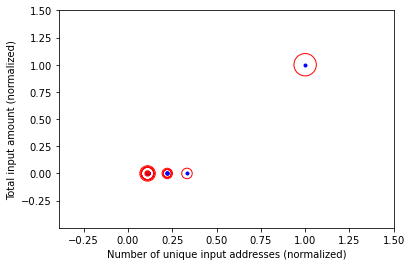

In [7]:
# Make some plots to visualize the local outlier factors of each point. We represent each point with a blue dot and
# the size of the local outlier factor of a data point is represented by the radius of a red circle around that point.

radius = (z - z.min()) / (z.max() - z.min())
ep = 0.5
x_min = X[:, 0].min() - ep
x_max = X[:, 0].max() + ep
y_min = X[:, 1].min() - ep
y_max = X[:, 1].max() + ep

plt.scatter(X[:, 0], X[:, 1], c = 'b', marker = ".")
plt.scatter(X[:, 0], X[:, 1], s = 500 * radius, edgecolors = 'r', facecolors = 'None')
plt.axis([x_min, x_max, y_min, y_max])
plt.xlabel('Number of unique input addresses (normalized)')
plt.ylabel('Total input amount (normalized)')
plt.show()

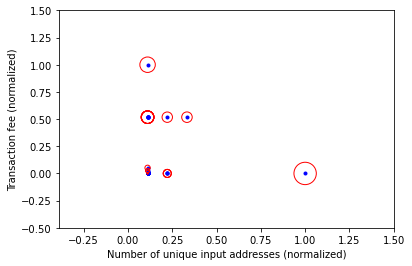

In [8]:
radius = (z - z.min()) / (z.max() - z.min())
ep = 0.5
x_min = X[:, 0].min() - ep
x_max = X[:, 0].max() + ep
y_min = X[:, 2].min() - ep
y_max = X[:, 2].max() + ep

plt.scatter(X[:, 0], X[:, 2], c = 'b', marker = ".")
plt.scatter(X[:, 0], X[:, 2], s = 500 * radius, edgecolors = 'r', facecolors = 'None')
plt.axis([x_min, x_max, y_min, y_max])
plt.xlabel('Number of unique input addresses (normalized)')
plt.ylabel('Transaction fee (normalized)')
plt.show()

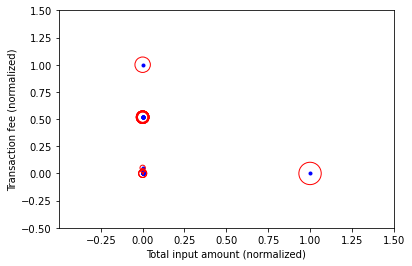

In [9]:
radius = (z - z.min()) / (z.max() - z.min())
ep = 0.5
x_min = X[:, 1].min() - ep
x_max = X[:, 1].max() + ep
y_min = X[:, 2].min() - ep
y_max = X[:, 2].max() + ep

plt.scatter(X[:, 1], X[:, 2], c = 'b', marker = ".")
plt.scatter(X[:, 1], X[:, 2], s = 500 * radius, edgecolors = 'r', facecolors = 'None')
plt.axis([x_min, x_max, y_min, y_max])
plt.xlabel('Total input amount (normalized)')
plt.ylabel('Transaction fee (normalized)')
plt.show()

In [10]:
# The transaction with the largest local outlier factor (the biggest red circle in the plots above) is exactly the famous 
# transaction attributed to the Mt. Gox CEO Mark Karpeles as described in this article: 
# https://news.bitcoin.com/eight-historic-bitcoin-transactions/

i_max = np.argmax(z, axis = 0)
print(block_132749_data.iloc[i_max])

                                    transaction_hash  \
0  3a1b9e330d32fef1ee42f8e86420d2be978bbe0dc5862f...   

   num_unique_input_addresses     total_input  transaction_fee  
0                           9  44200000000000                0  


In [11]:
# Next, let's look at our processed data for block 236502. This block has 1,181 transactions.
block_236502_data = pd.read_csv('block_236502_data.csv', header = 0)
# Display the first 10 entries.
block_236502_data.head(10)

,transaction_hash,num_unique_input_addresses,total_input,transaction_fee
0,ec05c8f1c93952bea9855cbb2515100b897f3b4d49c698...,1,13200000000,0
1,c7b5eabf94f3f3e583e6280d98870fffafefe71d3aa3aa...,3,4000000000,0
2,9801db1843f8eca9c6cceb19d0fe80d462fcf68aa1338e...,1,3433135190,0
3,b59fa7c4b91ff9e325ac0d826706cb24b899974191961f...,1,12961730000,0
4,62c45138d69e83b4009798bb60953e80c9fe5e0c010c21...,2,2001900000,300000
5,b23dc2968b53b1016fffc07faa1128d31dd4e5c7f471f1...,1,8000000000,0
6,cd80b5f4d2d5898f5a23e25d20bdc1b8a2e732887ff4cb...,1,3301075669,0
7,9cca0040f588212ea37ec2356da7f0db93075304873bf7...,1,2651925353,0
8,ba985a2871d0c51f422968446c2cf2e6ad0578afce534a...,3,5028500323,0
9,f17ed8432ea4ce725e5da7bd2192280ca2582060517110...,2,3034146890,30000


In [12]:
# We'll move this data to a numpy array in the same way as before.
X = block_236502_data[['num_unique_input_addresses', 'total_input', 'transaction_fee']].to_numpy()
max_by_col = np.amax(X, axis = 0)
X = X / max_by_col

In [13]:
# Fit lof to the new data and compute local outlier factors using the 100-neighborhood (roughly, the 100 nearest neighbors) 
# of each data point. See the note above about experimenting with the number of neighbors to use.
lof.fit(X)
z = lof.get_LOF(100)

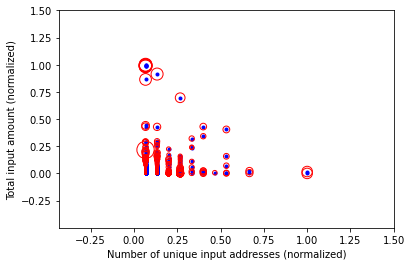

In [14]:
# Make some plots to visualize the local outlier factors of each point. We represent each point with a blue dot and
# the size of the local outlier factor of a data point is represented by the radius of a red circle around that point.

radius = (z - z.min()) / (z.max() - z.min())
ep = 0.5
x_min = X[:, 0].min() - ep
x_max = X[:, 0].max() + ep
y_min = X[:, 1].min() - ep
y_max = X[:, 1].max() + ep

plt.scatter(X[:, 0], X[:, 1], c = 'b', marker = ".")
plt.scatter(X[:, 0], X[:, 1], s = 300 * radius, edgecolors = 'r', facecolors = 'None')
plt.axis([x_min, x_max, y_min, y_max])
plt.xlabel('Number of unique input addresses (normalized)')
plt.ylabel('Total input amount (normalized)')
plt.show()

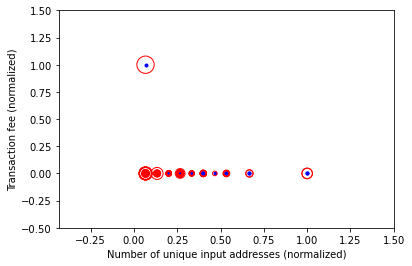

In [15]:
radius = (z - z.min()) / (z.max() - z.min())
ep = 0.5
x_min = X[:, 0].min() - ep
x_max = X[:, 0].max() + ep
y_min = X[:, 2].min() - ep
y_max = X[:, 2].max() + ep

plt.scatter(X[:, 0], X[:, 2], c = 'b', marker = ".")
plt.scatter(X[:, 0], X[:, 2], s = 300 * radius, edgecolors = 'r', facecolors = 'None')
plt.axis([x_min, x_max, y_min, y_max])
plt.xlabel('Number of unique input addresses (normalized)')
plt.ylabel('Transaction fee (normalized)')
plt.show()

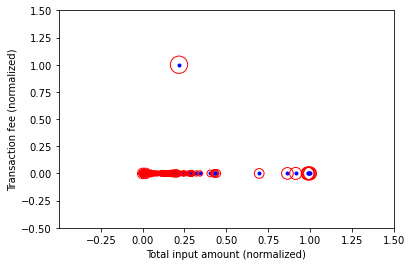

In [16]:
radius = (z - z.min()) / (z.max() - z.min())
ep = 0.5
x_min = X[:, 1].min() - ep
x_max = X[:, 1].max() + ep
y_min = X[:, 2].min() - ep
y_max = X[:, 2].max() + ep

plt.scatter(X[:, 1], X[:, 2], c = 'b', marker = ".")
plt.scatter(X[:, 1], X[:, 2], s = 300 * radius, edgecolors = 'r', facecolors = 'None')
plt.axis([x_min, x_max, y_min, y_max])
plt.xlabel('Total input amount (normalized)')
plt.ylabel('Transaction fee (normalized)')
plt.show()

In [17]:
# The transaction with the largest local outlier factor (the biggest red circle in the plots above -- it is hidden in the
# lower left of the first plot) is exactly the famous transaction with the accidental very large (30 BTC) transaction fee, 
# as described in this article: https://news.bitcoin.com/eight-historic-bitcoin-transactions/

i_max = np.argmax(z, axis = 0)
print(block_236502_data.iloc[i_max])

                                     transaction_hash  \
69  7e8fce9686572d8308d8c40fa3cb96fdbf96c0787c147d...   

    num_unique_input_addresses  total_input  transaction_fee  
69                           1   9814302082       3000000000  
